In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
all_variables = pd.read_csv('resources/all_data_final.csv')
all_variables.head()

,Unnamed: 0,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling,Fdi,Birth Per Woman,Water,Military,Status Developed
0,0,afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,...,33736494.0,17.2,17.3,0.479,10.1,0.849679,4.80,61.5,0.993455,0
1,1,afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,...,327582.0,17.5,17.5,0.476,10.0,0.209790,4.98,58.8,1.298013,0
2,2,afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,...,31731688.0,17.7,17.7,0.470,9.9,0.234965,5.17,56.2,1.076950,0
3,3,afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,...,3696958.0,17.9,18.0,0.463,9.8,0.284095,5.38,53.5,1.175417,0
4,4,afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,...,2978599.0,18.2,18.2,0.454,9.5,0.293039,5.60,50.9,1.821346,0


In [3]:
all_variables.count()

Unnamed: 0                         1362
Country                            1362
Year                               1362
Life Expectancy                    1362
Adult Mortality                    1362
Infant Deaths                      1362
Alcohol                            1362
Percentage Expenditure             1362
Hepatitis B                        1362
Measles                            1362
Bmi                                1362
Under-Five Deaths                  1362
Polio                              1362
Total Expenditure                  1362
Diphtheria                         1362
Hiv/Aids                           1362
Gdp                                1362
Population                         1362
Thinness 1-19 Years                1362
Thinness 5-9 Years                 1362
Income Composition Of Resources    1362
Schooling                          1362
Fdi                                1362
Birth Per Woman                    1362
Water                              1362


# Random Forest Socioeconomic & Health Variable Model

In [8]:
nonhealth_vars = ['Life Expectancy', 'Alcohol', 'Percentage Expenditure', 'Total Expenditure',\
                  'Gdp', 'Population','Income Composition Of Resources', 'Schooling','Fdi', \
                  'Birth Per Woman', 'Water', 'Military', 'Status Developed']
nonhealth_df = all_variables[nonhealth_vars].copy()

#declare x and y variables
X = nonhealth_df.drop(columns=['Life Expectancy'])
y = nonhealth_df['Life Expectancy'].values.reshape(-1, 1)
print(X.shape, y.shape)


(1362, 12) (1362, 1)


In [9]:
#split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#use a random forest regressor model. Fit the model with the train data.
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_scaled.ravel())

#Score the model with the test data
rf.score(X_test_scaled, y_test_scaled)

0.9270076934284246

In [10]:
#Display the feature importance of each x variable
feature_names = X.columns
features = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

features

[(0.6193980075082602, 'Water'),
 (0.17990267506831475, 'Income Composition Of Resources'),
 (0.05533538932767736, 'Alcohol'),
 (0.05416389689492015, 'Birth Per Woman'),
 (0.02432336364342003, 'Total Expenditure'),
 (0.02136745531609762, 'Military'),
 (0.011231038062658625, 'Schooling'),
 (0.010292998163826996, 'Fdi'),
 (0.0080987115341426, 'Gdp'),
 (0.007894586380472642, 'Population'),
 (0.007685651195995746, 'Percentage Expenditure'),
 (0.0003062269042132602, 'Status Developed')]

In [11]:
#create a dataframe of the feature importances
feature_df = pd.DataFrame.from_records(features, columns =['feature_importance', 'variables']) 
feature_df.sort_values('feature_importance',inplace=True)

feature_df

,feature_importance,variables
11,0.000306,Status Developed
10,0.007686,Percentage Expenditure
9,0.007895,Population
8,0.008099,Gdp
7,0.010293,Fdi
6,0.011231,Schooling
5,0.021367,Military
4,0.024323,Total Expenditure
3,0.054164,Birth Per Woman
2,0.055335,Alcohol


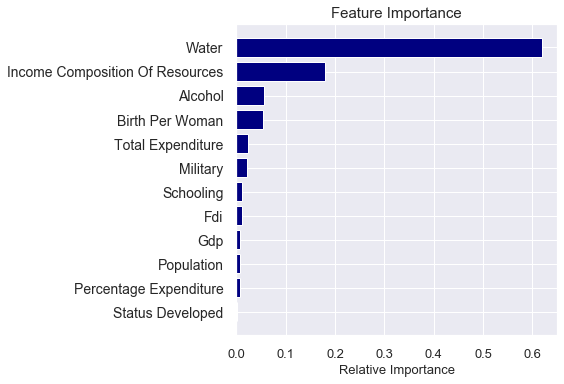

In [15]:
ax = plt.subplot(1,1,1)
ax.barh(feature_df['variables'], feature_df['feature_importance'], color='navy' )
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Relative Importance', fontsize=13)

plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.style.use('seaborn')

plt.tight_layout()

sns.set(font_scale=1)
plt.savefig('images/features.png')
plt.show()

In [16]:
corr = nonhealth_df.corr()
corr

,Life Expectancy,Alcohol,Percentage Expenditure,Total Expenditure,Gdp,Population,Income Composition Of Resources,Schooling,Fdi,Birth Per Woman,Water,Military,Status Developed
Life Expectancy,1.000000,0.424602,0.412498,0.185211,0.445018,-0.035213,0.806214,0.739957,0.117346,-0.789355,0.794633,-0.021060,0.448808
Alcohol,0.424602,1.000000,0.414573,0.206667,0.431307,-0.064222,0.574397,0.620082,0.076447,-0.491153,0.460605,-0.137080,0.616435
Percentage Expenditure,0.412498,0.414573,1.000000,0.178651,0.959534,-0.025463,0.436977,0.427002,0.072578,-0.285032,0.299652,-0.082033,0.450036
Total Expenditure,0.185211,0.206667,0.178651,1.000000,0.176395,-0.097080,0.168923,0.257662,0.106137,-0.112623,0.128428,0.000251,0.195782
Gdp,0.445018,0.431307,0.959534,0.176395,1.000000,-0.032579,0.480689,0.469813,0.098741,-0.320077,0.341905,-0.053029,0.472269
Population,-0.035213,-0.064222,-0.025463,-0.097080,-0.032579,1.000000,-0.048114,-0.066166,-0.042148,0.002027,0.002407,0.022105,-0.048231
Income Composition Of Resources,0.806214,0.574397,0.436977,0.168923,0.480689,-0.048114,1.000000,0.844179,0.106311,-0.771627,0.799491,-0.092140,0.504453
Schooling,0.739957,0.620082,0.427002,0.257662,0.469813,-0.066166,0.844179,1.000000,0.079273,-0.752993,0.749023,-0.054896,0.519588
Fdi,0.117346,0.076447,0.072578,0.106137,0.098741,-0.042148,0.106311,0.079273,1.000000,-0.098678,0.085324,-0.055458,0.214197
Birth Per Woman,-0.789355,-0.491153,-0.285032,-0.112623,-0.320077,0.002027,-0.771627,-0.752993,-0.098678,1.000000,-0.853307,0.054155,-0.422354


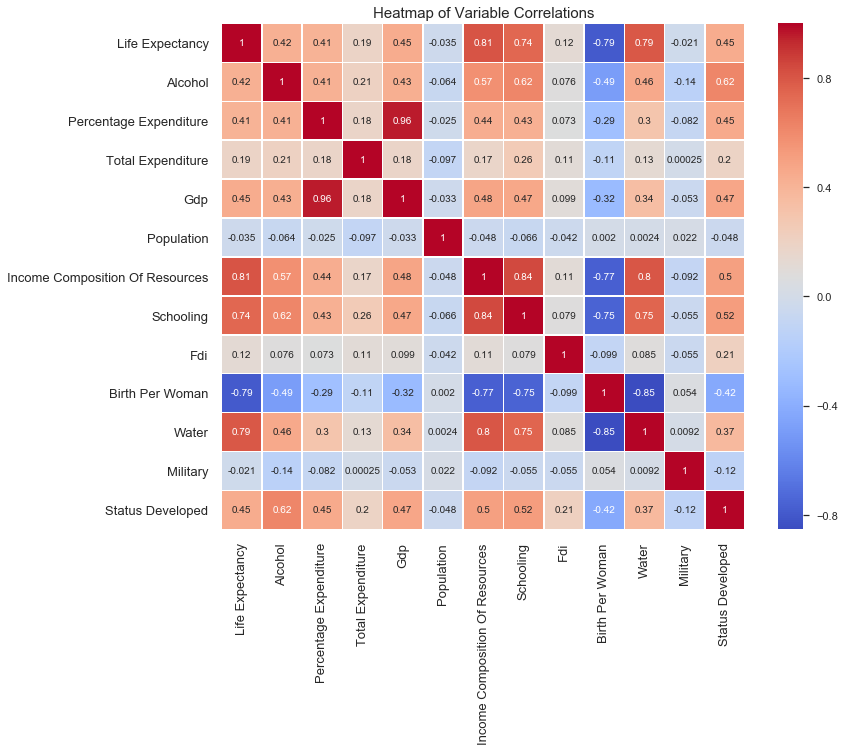

In [17]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, annot_kws={"fontsize":10}, fmt='.2g',\
            cmap='coolwarm')
plt.tight_layout()
plt.title('Heatmap of Variable Correlations', fontsize=15)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

#fix cut off of heatmap by adding spacing to bottom and top (fix found here https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top)
plt.savefig('images/heatmap.png')
plt.show() 

# Random Forest Mortality Rate Variable Model

In [18]:
#select only variables to be used in model
health_cols = ['Life Expectancy', 'Adult Mortality', 'Infant Deaths','Hepatitis B',\
               'Measles', 'Bmi', 'Under-Five Deaths', 'Polio','Diphtheria', 'Hiv/Aids', 'Thinness 1-19 Years',\
               'Thinness 5-9 Years']

health_model = all_variables[health_cols].copy()



health_model.head()

,Life Expectancy,Adult Mortality,Infant Deaths,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Diphtheria,Hiv/Aids,Thinness 1-19 Years,Thinness 5-9 Years
0,65.0,263.0,62,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3
1,59.9,271.0,64,62.0,492,18.6,86,58.0,62.0,0.1,17.5,17.5
2,59.9,268.0,66,64.0,430,18.1,89,62.0,64.0,0.1,17.7,17.7
3,59.5,272.0,69,67.0,2787,17.6,93,67.0,67.0,0.1,17.9,18.0
4,59.2,275.0,71,68.0,3013,17.2,97,68.0,68.0,0.1,18.2,18.2


In [19]:
#declare x and y variables
X_2 = health_model.drop(columns=['Life Expectancy'])
y_2 = health_model['Life Expectancy'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1362, 12) (1362, 1)


In [20]:
#split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=42)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


#use a random forest regressor model. Fit the model with the train data.
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train.ravel())

#Score the model with the test data
rf.score(X_test, y_test.ravel())

0.9488020148044684

In [21]:
#Display the feature importance of each x variable
feature_names_m = X_2.columns
features_m = sorted(zip(rf.feature_importances_, feature_names_m), reverse=True)

features_m

[(0.4278960881413719, 'Hiv/Aids'),
 (0.3162344326060136, 'Adult Mortality'),
 (0.12748242791152753, 'Thinness 5-9 Years'),
 (0.03425357919847086, 'Under-Five Deaths'),
 (0.028483652314762492, 'Bmi'),
 (0.018071631081957137, 'Thinness 1-19 Years'),
 (0.014791375133940715, 'Infant Deaths'),
 (0.009696467084821428, 'Measles'),
 (0.008740771760005905, 'Hepatitis B'),
 (0.007448124722682539, 'Polio'),
 (0.006901450044445842, 'Diphtheria')]

In [22]:
#create a dataframe of the feature importances
feature_m_df = pd.DataFrame.from_records(features_m, columns =['feature_importance', 'variables']) 
feature_m_df.sort_values('feature_importance',inplace=True)

feature_m_df

,feature_importance,variables
10,0.006901,Diphtheria
9,0.007448,Polio
8,0.008741,Hepatitis B
7,0.009696,Measles
6,0.014791,Infant Deaths
5,0.018072,Thinness 1-19 Years
4,0.028484,Bmi
3,0.034254,Under-Five Deaths
2,0.127482,Thinness 5-9 Years
1,0.316234,Adult Mortality


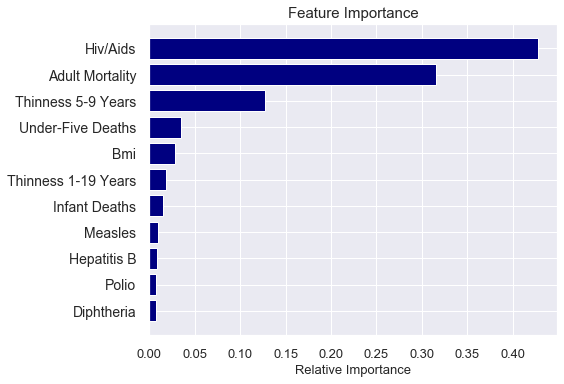

In [23]:
ax = plt.subplot(1,1,1)
ax.barh(feature_m_df['variables'], feature_m_df['feature_importance'], color='navy' )
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Relative Importance', fontsize=13)
plt.style.use('seaborn')

plt.yticks(fontsize=14)
plt.xticks(fontsize=13)

plt.tight_layout()
plt.savefig('images/mortality_features.png')
plt.show()

In [25]:
m_corr = health_model.corr()
m_corr

,Life Expectancy,Adult Mortality,Infant Deaths,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Diphtheria,Hiv/Aids,Thinness 1-19 Years,Thinness 5-9 Years
Life Expectancy,1.000000,-0.731296,-0.191215,0.227432,-0.086817,0.572736,-0.215590,0.360015,0.390379,-0.616306,-0.497171,-0.500460
Adult Mortality,-0.731296,1.000000,0.048827,-0.133717,-0.000418,-0.370781,0.067993,-0.239695,-0.240177,0.644074,0.301449,0.314562
Infant Deaths,-0.191215,0.048827,1.000000,-0.253428,0.528457,-0.260465,0.996885,-0.169378,-0.190149,0.016149,0.528363,0.526956
Hepatitis B,0.227432,-0.133717,-0.253428,1.000000,-0.136489,0.193979,-0.262827,0.451619,0.587445,-0.116576,-0.191932,-0.199291
Measles,-0.086817,-0.000418,0.528457,-0.136489,1.000000,-0.174081,0.513141,-0.064007,-0.074439,0.002323,0.212868,0.206052
Bmi,0.572736,-0.370781,-0.260465,0.193979,-0.174081,1.000000,-0.268476,0.220705,0.234215,-0.240771,-0.511827,-0.522228
Under-Five Deaths,-0.215590,0.067993,0.996885,-0.262827,0.513141,-0.268476,1.000000,-0.184390,-0.208500,0.030612,0.529414,0.526964
Polio,0.360015,-0.239695,-0.169378,0.451619,-0.064007,0.220705,-0.184390,1.000000,0.607195,-0.159814,-0.204731,-0.223705
Diphtheria,0.390379,-0.240177,-0.190149,0.587445,-0.074439,0.234215,-0.208500,0.607195,1.000000,-0.180881,-0.263573,-0.263345
Hiv/Aids,-0.616306,0.644074,0.016149,-0.116576,0.002323,-0.240771,0.030612,-0.159814,-0.180881,1.000000,0.200130,0.213195


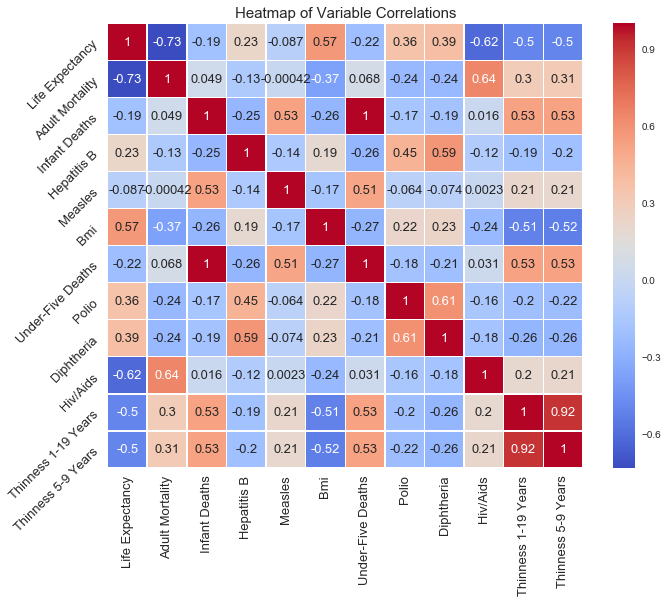

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(m_corr, annot=True, linewidths=.5, ax=ax, annot_kws={"fontsize":13}, fmt='.2g',\
            cmap='coolwarm')
plt.tight_layout()
plt.title('Heatmap of Variable Correlations', fontsize=15)

plt.yticks(fontsize=13, rotation=45)
plt.xticks(fontsize=13)

#fix cut off of heatmap by adding spacing to bottom and top (fix found here https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top)
plt.savefig('images/mortality_heatmap.png')
plt.show() 